In [110]:
# Load libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
from sklearn.model_selection import train_test_split # Data split
from sklearn.preprocessing import StandardScaler # Data normalization
from imblearn.over_sampling import RandomOverSampler # Data sampling
import tensorflow as tf # Deep Learning
 

In [111]:
df = pd.read_csv('diabetes.csv') # Load the data
df.head() # Show the first 5 rows of the data set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [112]:
len(df[df['Outcome']==1]) , len(df[df['Outcome']==0]) # count the number of diabetic and non diabetic patients
# as we can see the data is imbalanced so we need to normalize it

(268, 500)

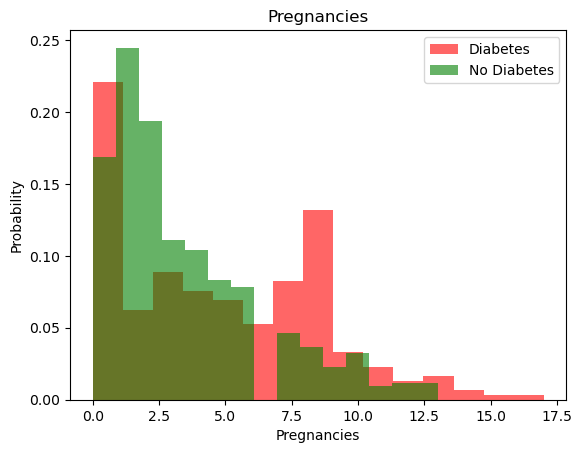

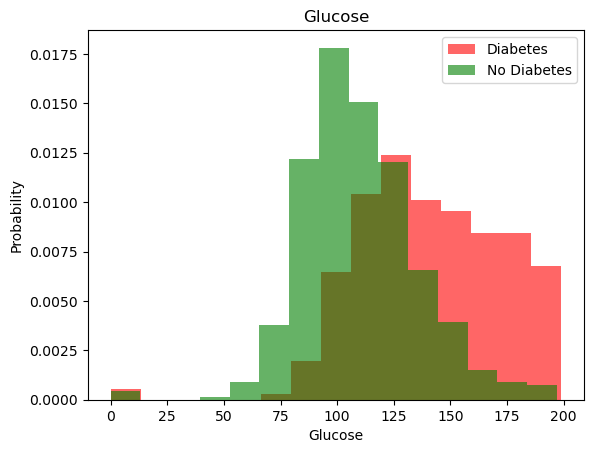

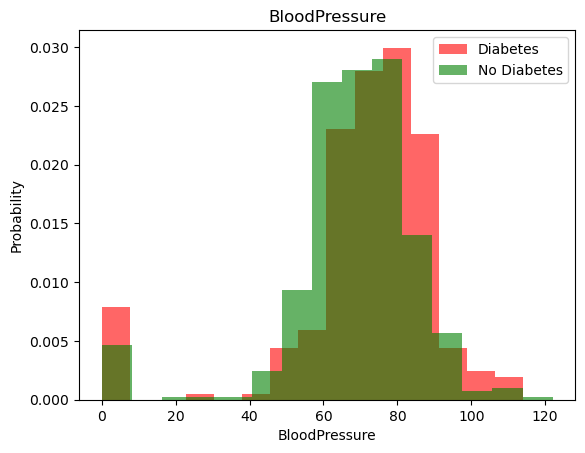

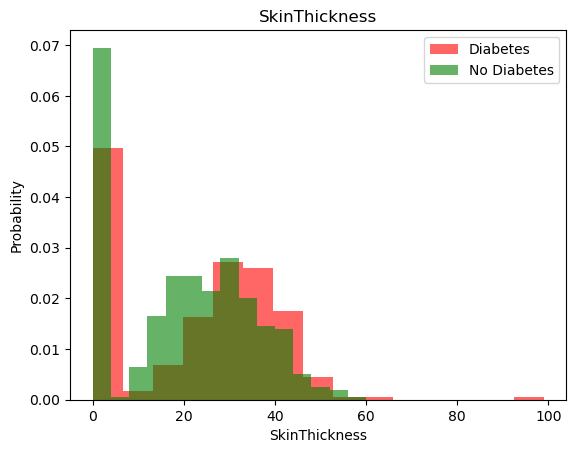

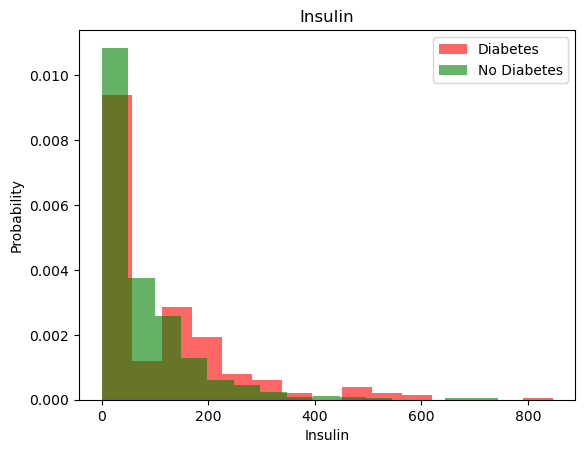

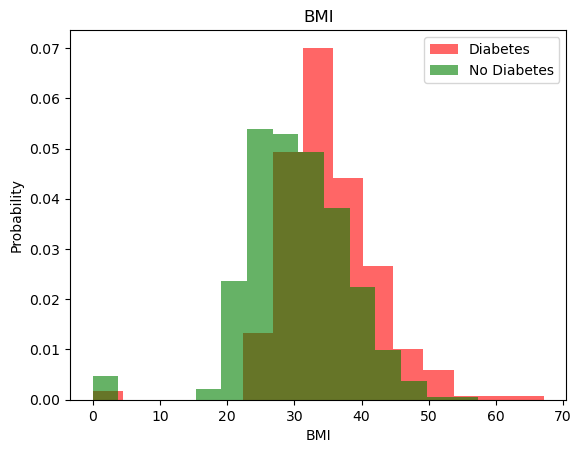

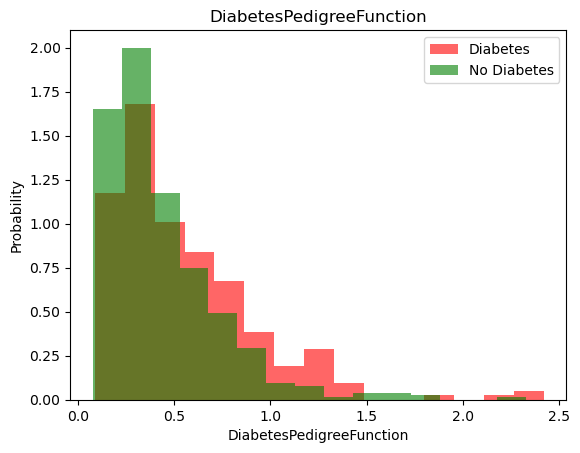

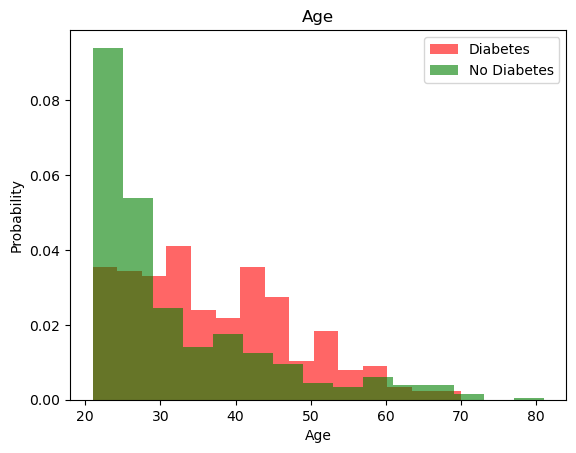

In [113]:
# Visualize the data correlation between the features and the target
for i in range(len(df.columns[:-1])): # for each feature draw a histogram
    label = df.columns[i] # get the feature name
    # color - to distinguish between the diabetic and non diabetic patients
    # alpha - to see the overlapping between the diabetic and non diabetic patients
    # density - to normalize the data such that the area under the histogram becomes 1
    # bins - to specify the number of bins in the histogram.determines the number of equally spaced divisions in the range of the data. too few bins may oversimplify patterns in the data, while too many may leave patterns unrecognized due to over-specification.
    plt.hist(df[df.Outcome==1][label], color= 'red', alpha =  0.6, label='Diabetes' , density = True, bins = 15)  # draw histogram for the diabetic patients

    plt.hist(df[df.Outcome==0][label],color = 'green', alpha =  0.6, label='No Diabetes' , density = True, bins = 15)  # draw histogram for the non diabetic patients
    plt.title(label) # write the feature name as title
    plt.ylabel('Probability') 
    plt.xlabel(label)
    plt.legend() 
    plt.show() # show the plot
    

In [114]:
# Split the data into features and target
X = df[df.columns[:-1]].values # get the features
y = df[df.columns[-1]].values # get the target

In [115]:
# Normalize the data
# normalization is the process of scaling individual samples to have unit norm
# in example, if we have 2 features, one with values ranging from 0 to 1 and the other with values ranging from 0 to 1000,
# the second feature will have more effect on the model than the first feature. so we need to scale the features to have the same effect on the model
# normalization is important because it may speed up the training process and reduce the chances of getting stuck in local optima
scaler = StandardScaler() # create the scaler object
X = scaler.fit_transform(X) # fit the data to the scaler object

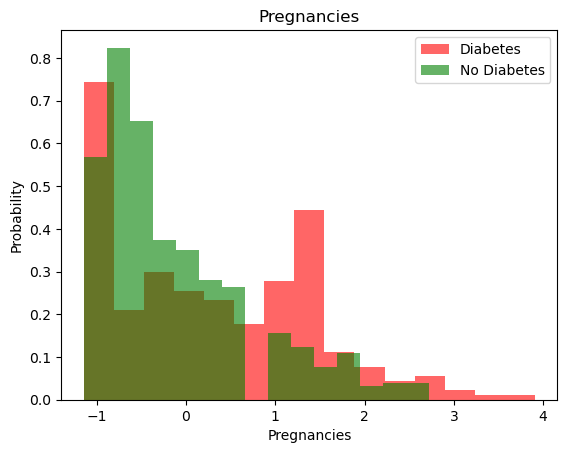

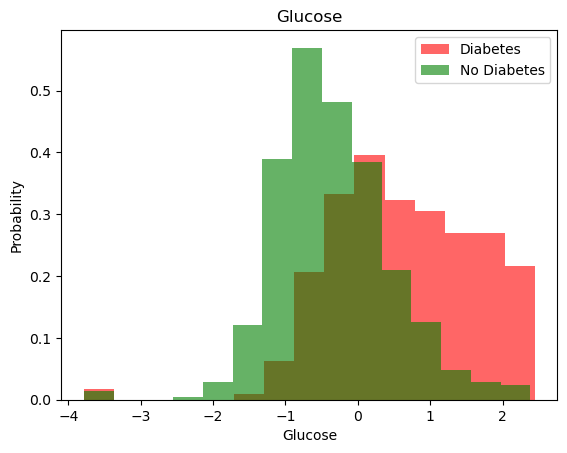

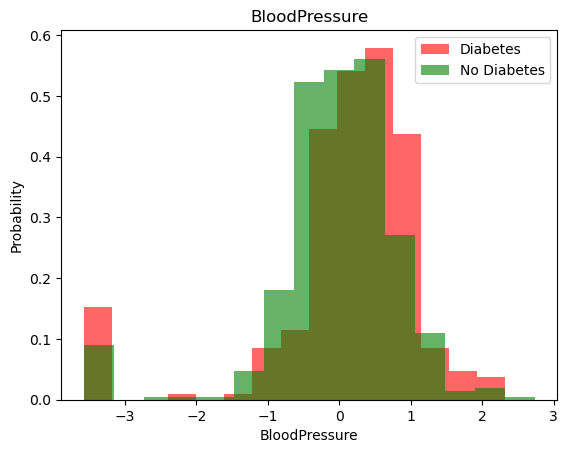

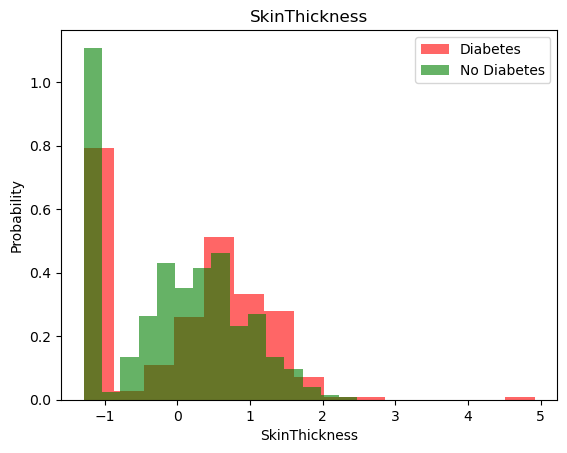

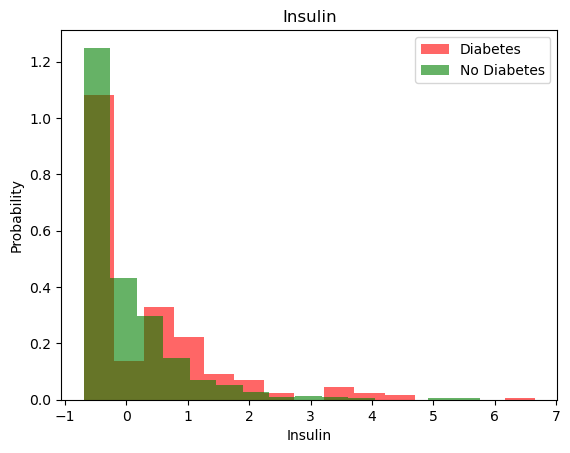

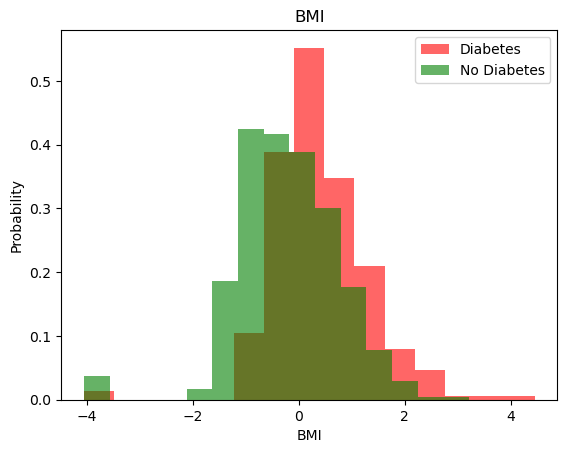

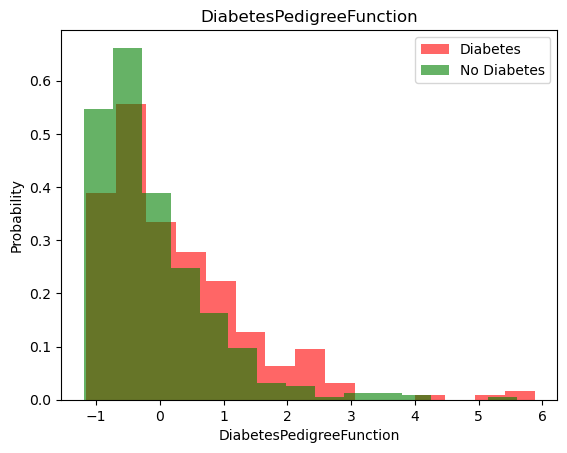

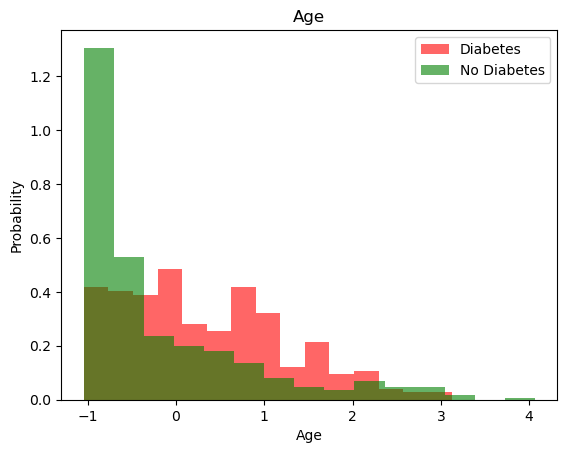

In [116]:
# Visualize scaled data
# need to reshape the target because it's a 1D array and we need it to be 2D array to be able to stack it with the features
data = np.hstack((X, np.reshape(y,(-1,1)))) # stack the features and target in one array 
transformed_df = pd.DataFrame(data, columns=df.columns) # create a data frame from the stacked data

for i in range(len(transformed_df.columns[:-1])): 
    label = transformed_df.columns[i]
    plt.hist(transformed_df[transformed_df.Outcome==1][label], color= 'red', alpha =  0.6, label='Diabetes' , density = True, bins = 15)
    plt.hist(transformed_df[transformed_df.Outcome==0][label],color = 'green', alpha =  0.6, label='No Diabetes' , density = True, bins = 15)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show() 

In [117]:
# Resample the data to solve the imbalanced data problem (we have more non diabetic patients than diabetic patients)
over = RandomOverSampler()
X, y = over.fit_resample(X, y)

data = np.hstack((X, np.reshape(y,(-1,1)))) 
transformed_df = pd.DataFrame(data, columns=df.columns)

len(transformed_df[transformed_df['Outcome']==1]) , len(transformed_df[transformed_df['Outcome']==0])  # count the number of diabetic and non diabetic patients after resampling (must be equal)

(500, 500)

In [118]:
# use sklearn to split the data into train and test sets
# test_size - the percentage of the data that will be used for testing
# random_state - shuffles the data if needed, 0 - will give the same results
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0) # split the data into train and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0) # split the data into validation and test sets
# now data is split into 3 sets: train, validation and test
# train 60% - data used for training the model
# validation 20% - data used for tuning the model hyperparameters
# test 20% - data used for testing the model after its built

In [119]:
# build the model
# Sequential model - a linear stack of layers. Each layer has exactly one input tensor and one output tensor.
# It's called sequential because the output of one layer is the input of the next layer
# Number of the neurons guideline:
# 1- The number of neurons in the output layer should be equal to the number of classes in the problem 
# for binary classification we have 2 classes, so we need 1 neuron in the output layer with sigmoid activation function
# for multi class classification we have more than 2 classes ,so we need n neurons in the output layer with softmax activation function
# 2- The input size is usually the number of features in the data set
# 3- The number of neurons in the hidden layers is usually between the number of neurons in the input layer and output layer
# 4- If model is overfitting, decrease the number of neurons in the hidden layers
# If model is underfitting, increase the number of neurons in the hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu' , input_shape=(8,)) , # first layer with 16 neurons and relu activation function, relu(x) = max(0,x) , input shape is the number of features in the data set 
    tf.keras.layers.Dense(7, activation='relu'),  # more relu layers to increase the non-linearity of the model
    tf.keras.layers.Dense(1, activation='sigmoid') # output layer with 1 neuron and sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x))
]) 




In [120]:
# Compile the model
# optimizer - the algorithm used to update the weights of the model to minimize the loss function, adam is the most common
# learning_rate - determines the step size at each iteration while moving toward a minimum of a loss function (alpha in gradient descent)
# loss - the objective that the model will try to minimize, for binary classification we use binary crossentropy
# metrics - used to monitor the training and testing steps, accuracy is the fraction of the data that are correctly classified
model.compile(
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001), # gradient descent algorithm
    loss =  tf.keras.losses.BinaryCrossentropy(), # loss function
    metrics = ['accuracy'] 
)

In [121]:
# Evaluate the model
model.evaluate(X_train, y_train) 

model.evaluate(X_valid, y_valid)
# Accuracy is low because the model is not trained yet

7/7 [==============================] - 0s 672us/step - loss: 0.7567 - accuracy: 0.4500


[0.7567171454429626, 0.44999998807907104]

In [126]:
# Train the model
# epochs - the number of times the model will see the entire training data set
# too few epochs will underfit the model, while too many epochs will overfit the model
# batch_size - the number of training examples in one forward/backward pass (before updating the weights)
# one epoch is too large to feed to the computer at once, so we divide it into several smaller batches

model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_valid, y_valid)) 

Epoch 1/30
38/38 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.7700 - val_loss: 0.4707 - val_accuracy: 0.7850
Epoch 2/30
38/38 [==============================] - 0s 808us/step - loss: 0.4803 - accuracy: 0.7750 - val_loss: 0.4707 - val_accuracy: 0.7900
Epoch 3/30
38/38 [==============================] - 0s 837us/step - loss: 0.4793 - accuracy: 0.7717 - val_loss: 0.4703 - val_accuracy: 0.7900
Epoch 4/30
38/38 [==============================] - 0s 876us/step - loss: 0.4783 - accuracy: 0.7717 - val_loss: 0.4688 - val_accuracy: 0.7850
Epoch 5/30
38/38 [==============================] - 0s 835us/step - loss: 0.4773 - accuracy: 0.7733 - val_loss: 0.4694 - val_accuracy: 0.7850
Epoch 6/30
38/38 [==============================] - 0s 808us/step - loss: 0.4764 - accuracy: 0.7700 - val_loss: 0.4708 - val_accuracy: 0.7800
Epoch 7/30
38/38 [==============================] - 0s 762us/step - loss: 0.4764 - accuracy: 0.7717 - val_loss: 0.4696 - val_accuracy: 0.7800
Epoch 8/

In [127]:
model.evaluate(X_test, y_test) # evaluate the model on the test set

7/7 [==============================] - 0s 704us/step - loss: 0.4587 - accuracy: 0.7800


[0.45869019627571106, 0.7799999713897705]